In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
file_path = '/content/sample_data/sectorwiseMerged.csv'  # Update this path if necessary
data = pd.read_csv(file_path)
data.head()

,Date,Temp (°C),Humidity (%),Season,Solar Energy (kWh),Precipitation (mm),Population,Total Usage (kWh),Urban Usage (kWh),Rural Usage (kWh),Urban Household (kWh),Urban Industrial (kWh),Urban Commercial (kWh),Urban Others (kWh),Rural Household (kWh),Rural Industrial (kWh),Rural Commercial (kWh),Rural Others (kWh),Period,Adjusted Total Usage (kWh)
0,2018-01-01,19.4,62.6,Winter,18.6,0.0,3130000.0,2870.0,2009.0,861.0,800.78,605.52,502.25,100.45,460.32,172.2,172.2,56.28,NaN,NaN
1,2018-01-02,19.4,64.0,Winter,18.7,0.0,3130000.0,2875.0,2012.5,862.5,622.69,786.06,503.12,100.62,437.34,172.5,172.5,80.16,NaN,NaN
2,2018-01-03,19.5,66.6,Winter,18.8,0.0,3130000.0,2890.0,2023.0,867.0,763.69,652.41,505.75,101.15,459.28,173.4,173.4,60.92,NaN,NaN
3,2018-01-04,20.1,66.6,Winter,18.4,0.0,3130000.0,2930.0,2051.0,879.0,703.65,732.05,512.75,102.55,482.84,175.8,175.8,44.56,NaN,NaN
4,2018-01-05,20.0,66.7,Winter,17.5,0.0,3130000.0,2875.0,2012.5,862.5,618.00,790.75,503.12,100.62,452.72,172.5,172.5,64.78,NaN,NaN


In [3]:
# Check for missing values and basic statistics
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2460 non-null   object 
 1   Temp (°C)                   1729 non-null   float64
 2   Humidity (%)                1729 non-null   float64
 3   Season                      2460 non-null   object 
 4   Solar Energy (kWh)          1729 non-null   float64
 5   Precipitation (mm)          1729 non-null   float64
 6   Population                  1729 non-null   float64
 7   Total Usage (kWh)           2460 non-null   float64
 8   Urban Usage (kWh)           2460 non-null   float64
 9   Rural Usage (kWh)           2460 non-null   float64
 10  Urban Household (kWh)       1729 non-null   float64
 11  Urban Industrial (kWh)      1729 non-null   float64
 12  Urban Commercial (kWh)      1729 non-null   float64
 13  Urban Others (kWh)          1729 

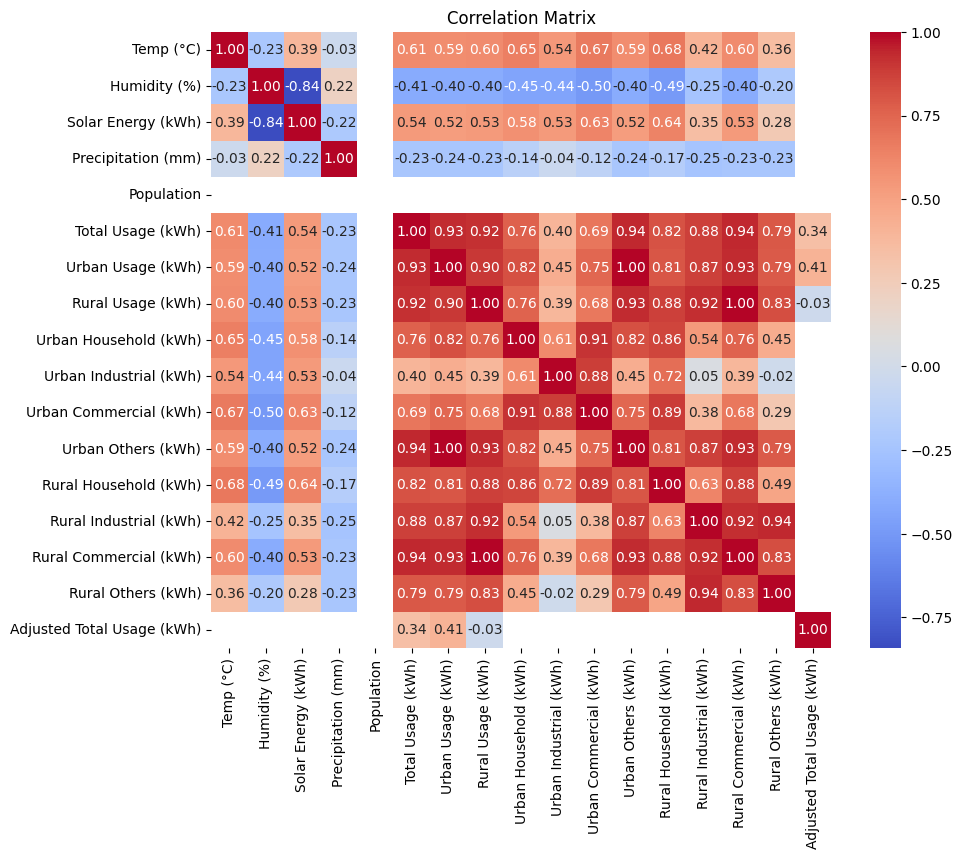

In [5]:
# Ensure only numeric columns are included in the correlation matrix
numeric_data = data.select_dtypes(include=[float, int])

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Convert problematic numeric columns to proper types
for col in data.select_dtypes(include=['object']).columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except:
        pass

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Ensure consistent string type
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display head of cleaned data
print(data.head())

   Date  Temp (°C)  Humidity (%)  Season  Solar Energy (kWh)  \
0   NaN  -2.166053     -0.511605     NaN            0.146624   
1   NaN  -2.166053     -0.406449     NaN            0.166527   
2   NaN  -2.123799     -0.211159     NaN            0.186431   
3   NaN  -1.870281     -0.211159     NaN            0.106816   
4   NaN  -1.912534     -0.203648     NaN           -0.072316   

   Precipitation (mm)  Population  Total Usage (kWh)  Urban Usage (kWh)  \
0           -0.225549         0.0          -0.817438          -0.776042   
1           -0.225549         0.0          -0.810016          -0.768909   
2           -0.225549         0.0          -0.787749          -0.747509   
3           -0.225549         0.0          -0.728371          -0.690443   
4           -0.225549         0.0          -0.810016          -0.768909   

   Rural Usage (kWh)  Urban Household (kWh)  Urban Industrial (kWh)  \
0          -0.897883              -0.249110               -1.293043   
1          -0.890130  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [20]:
# Initialize the imputer (filling missing values with the mean of the column)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Apply the imputer to the features and target
X_imputed = imputer.fit_transform(data.drop(target_column, axis=1))
y_imputed = data[target_column].fillna(imputer.strategy)  # Fill target column if it has missing values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (1968, 16)
Testing set size: (492, 16)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Date' 'Season' 'Period']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [21]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Evaluate both models
models = {'Linear Regression': lr, 'Random Forest': rf}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name} Results:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
    print(f'R² Score: {r2_score(y_test, y_pred):.4f}')
    print('-' * 30)

Linear Regression Results:
MAE: 0.3251
MSE: 0.2526
R² Score: 0.7433
------------------------------
Random Forest Results:
MAE: 0.2122
MSE: 0.1322
R² Score: 0.8656
------------------------------


In [24]:
# Ensure X_test is a pandas DataFrame
X_test = pd.DataFrame(X_test)

# Forecast on new data (replace with actual data for prediction)
new_data = X_test.iloc[:5]  # Extracting the first 5 test samples as a DataFrame
predictions = rf.predict(new_data)  # Predict using the RandomForest model
print('Predictions:', predictions)

Predictions: [ 0.81120568  0.45473181  0.         -0.36967623 -1.03704468]
